In [1]:
import numpy as np 
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import os
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# from sklearn.preprocessing import 

In [3]:
dataset = pd.read_csv("/kaggle/input/titanic/train.csv")

In [4]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
dir(dataset)

['Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'T',
 'Ticket',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',

In [7]:
dataset.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dataset.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
dataset.shape

(891, 12)

In [12]:
dataset['Age'].mean()

29.69911764705882

In [13]:
dataset.dropna().shape

(183, 12)

In [14]:
dataset.fillna({'Age' :dataset['Age'].mean()}, inplace = True)

In [15]:
dataset.dropna().shape

(202, 12)

In [16]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
dataset.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [18]:
dataset['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [19]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
dataset.set_index(keys=dataset['PassengerId'], inplace=True)

In [21]:
dataset.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

In [22]:
dataset.dropna(inplace=True)

In [23]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [24]:
dataset_with_dummies = pd.get_dummies(dataset, columns = ['Sex', 'Embarked'], drop_first=True, )

In [25]:
dataset_with_dummies = dataset_with_dummies.astype(np.float32)

In [26]:
dataset_with_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0.0,3.0,22.0,1.0,0.0,7.250000,1.0,0.0,1.0
2,1.0,1.0,38.0,1.0,0.0,71.283302,0.0,0.0,0.0
3,1.0,3.0,26.0,0.0,0.0,7.925000,0.0,0.0,1.0
4,1.0,1.0,35.0,1.0,0.0,53.099998,0.0,0.0,1.0
5,0.0,3.0,35.0,0.0,0.0,8.050000,1.0,0.0,1.0


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_regression

In [28]:
Y = dataset['Survived'].astype(np.int8)

In [29]:
Y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 889, dtype: int8

In [30]:
X = dataset_with_dummies.drop(columns='Survived')

In [31]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,3.0,22.000000,1.0,0.0,7.250000,1.0,0.0,1.0
2,1.0,38.000000,1.0,0.0,71.283302,0.0,0.0,0.0
3,3.0,26.000000,0.0,0.0,7.925000,0.0,0.0,1.0
4,1.0,35.000000,1.0,0.0,53.099998,0.0,0.0,1.0
5,3.0,35.000000,0.0,0.0,8.050000,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
887,2.0,27.000000,0.0,0.0,13.000000,1.0,0.0,1.0
888,1.0,19.000000,0.0,0.0,30.000000,0.0,0.0,1.0
889,3.0,29.699118,1.0,2.0,23.450001,0.0,0.0,1.0


In [32]:
scalar = StandardScaler()

In [33]:
X = scalar.fit_transform(X)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [35]:
x_train, y_train

(array([[-1.5722111 , -0.59049493, -0.47519907, ..., -1.3599113 ,
         -0.3079409 ,  0.61679393],
        [ 0.82520866,  0.00352373,  0.43135026, ..., -1.3599113 ,
         -0.3079409 , -1.621287  ],
        [ 0.82520866,  0.18104628, -0.47519907, ...,  0.735342  ,
         -0.3079409 ,  0.61679393],
        ...,
        [-1.5722111 ,  1.4155122 , -0.47519907, ..., -1.3599113 ,
         -0.3079409 ,  0.61679393],
        [ 0.82520866, -0.66764903,  1.3378996 , ..., -1.3599113 ,
         -0.3079409 ,  0.61679393],
        [ 0.82520866,  0.2582004 , -0.47519907, ...,  0.735342  ,
         -0.3079409 ,  0.61679393]], dtype=float32),
 PassengerId
 709    1
 241    0
 383    0
 793    0
 684    0
       ..
 108    1
 272    1
 863    1
 437    0
 104    0
 Name: Survived, Length: 711, dtype: int8)

In [36]:
logistic_regressor = LogisticRegression()

In [37]:
logistic_regressor.fit(x_train, y_train)

LogisticRegression()

In [38]:
y_pred = logistic_regressor.predict(x_test)

In [39]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int8)

In [40]:
accuracy_score(y_test, y_pred)

0.7752808988764045

In [41]:
logistic_regressor.__dir__()

['penalty',
 'dual',
 'tol',
 'C',
 'fit_intercept',
 'intercept_scaling',
 'class_weight',
 'random_state',
 'solver',
 'max_iter',
 'multi_class',
 'verbose',
 'warm_start',
 'n_jobs',
 'l1_ratio',
 'n_features_in_',
 'classes_',
 'n_iter_',
 'coef_',
 'intercept_',
 '__module__',
 '__annotations__',
 '__doc__',
 '_parameter_constraints',
 '__init__',
 'fit',
 'predict_proba',
 'predict_log_proba',
 'decision_function',
 'predict',
 '_predict_proba_lr',
 '_estimator_type',
 'score',
 '_more_tags',
 '__dict__',
 '__weakref__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__',
 'densify',
 'sparsify',
 '_get_param_names',
 'get_params',
 'set_params',
 '__getstate__',
 '__setstate__',
 '_get_tags',
 '_check_n_features',
 '_check_feature_na

In [42]:
logistic_regressor.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
logistic_regressor.coef_

array([[-0.95242841, -0.56859013, -0.42071146, -0.05554756,  0.07778867,
        -1.30513168, -0.02405184, -0.23438391]])

In [44]:
r_sqr = logistic_regressor.score(x_train, y_train)

In [45]:
r_sqr

0.7988748241912799

In [46]:
n = x_train.shape[0]
p = x_train.shape[1]

In [47]:
adj_r_sqr = 1 - (1-r_sqr)*(n-1)/(n-p-1)

In [48]:
adj_r_sqr

0.7965827993957388

In [49]:
f_regression(x_train,y_train)

(array([8.70143415e+01, 2.63009945e+00, 2.55709577e+00, 3.44980552e+00,
        4.58429116e+01, 2.80990370e+02, 3.62510491e-03, 1.73907789e+01]),
 array([1.34871615e-19, 1.05299725e-01, 1.10245631e-01, 6.36736588e-02,
        2.68971294e-11, 2.24552137e-53, 9.52006269e-01, 3.42002192e-05]))

In [50]:
x_train[:,[0,4,5,7]]

array([[-1.5722111 ,  2.404961  , -1.3599113 ,  0.61679393],
       [ 0.82520866, -0.35519713, -1.3599113 , -1.621287  ],
       [ 0.82520866, -0.48664993,  0.735342  ,  0.61679393],
       ...,
       [-1.5722111 , -0.12417029, -1.3599113 ,  0.61679393],
       [ 0.82520866,  0.04586954, -1.3599113 ,  0.61679393],
       [ 0.82520866, -0.47196892,  0.735342  ,  0.61679393]],
      dtype=float32)

In [51]:
new_regressor = LogisticRegression()

In [52]:
new_regressor.fit(x_train[:,[0,4,5,7]], y_train)

LogisticRegression()

In [53]:
new_regressor.score(x_train[:,[0,4,5,7]], y_train)

0.7749648382559775

In [54]:
new_y_pred = new_regressor.predict(x_test[:,[0,4,5,7]])

In [55]:
accuracy_score(y_test, new_y_pred)

0.7808988764044944

<Axes: xlabel='Pclass', ylabel='Survived'>

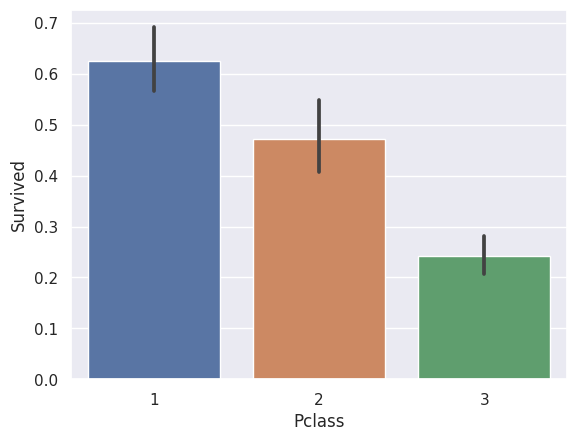

In [56]:
sns.barplot(dataset, x='Pclass', y = 'Survived')

<Axes: xlabel='Pclass', ylabel='count'>

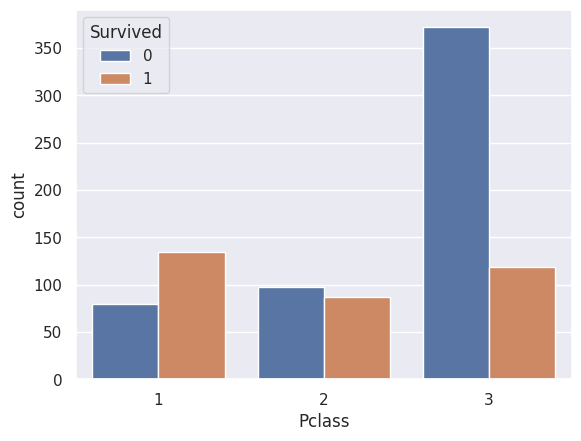

In [57]:
sns.countplot(dataset, x='Pclass', hue = 'Survived')

## As per the graphs, it is clear that probability surviving for people from class 1 is much higher than those from class 3

<Axes: xlabel='Sex', ylabel='Survived'>

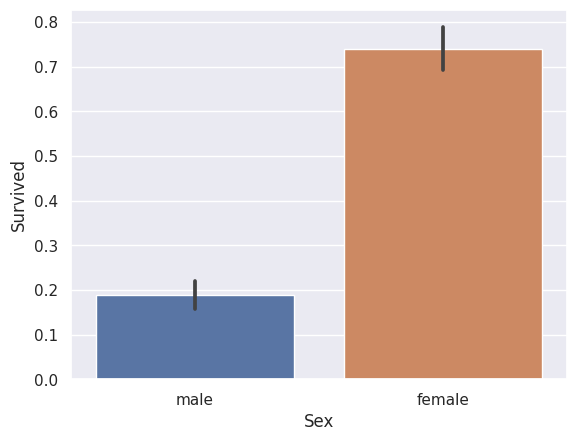

In [58]:
sns.barplot(dataset, x='Sex', y = 'Survived')

## Probability of survival for females is much higher than males

<Axes: xlabel='Pclass', ylabel='count'>

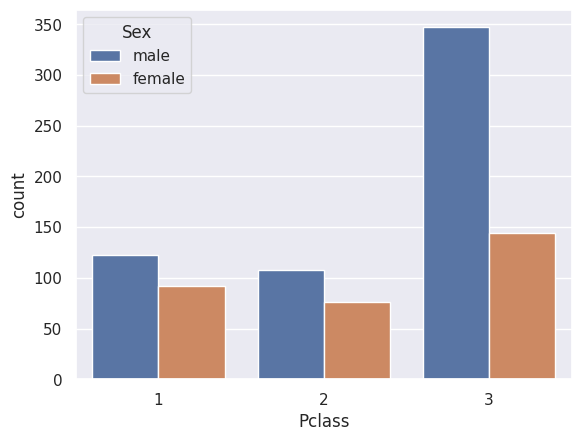

In [59]:
sns.countplot(dataset, x='Pclass', hue='Sex')

## Percentage of females is much higher in class 1 and 2 than class 3